In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [2]:
df = pd.read_csv("creditcard.csv")

In [28]:
X = df.iloc[:,0:len(df.columns)-2].values
y = df.iloc[:,len(df.columns)-1].values
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda x: x[0])
eig_pairs.reverse()
matrix_w = np.hstack((eig_pairs[0][1].reshape(29,1), 
                      eig_pairs[1][1].reshape(29,1),))
matrix_final = X_std.dot(matrix_w)


In [29]:
def mahalanobis_distance(a,s):
    at = a.T
    b = np.dot(at,s)
    c = np.dot(b,a)
    return math.sqrt(c)

In [30]:
u = np.mean(matrix_final, axis=0)
s = (matrix_final - u).T.dot((matrix_final - u)) / (len(matrix_final)-1)
si = np.linalg.inv(s)
new_matrix =[]
for i in matrix_final:
    a = i-u
    new_matrix.append(mahalanobis_distance(a,si))

In [31]:
new_matrix_sorted = sorted(range(len(new_matrix)), key=lambda k: new_matrix[k])

In [33]:
per = int(len(new_matrix)*0.05)

In [34]:
matrix_reduced = []
for i in new_matrix_sorted[0:len(new_matrix_sorted)-per]:
    matrix_reduced.append(matrix_final[i])

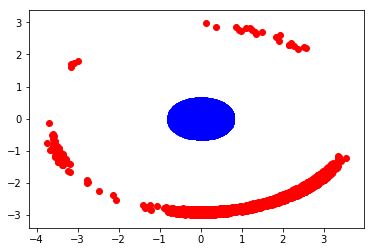

In [45]:
for i in matrix_reduced[0:30000]:
    plt.scatter(i[0],i[1],color='b')
for j in new_matrix_sorted[len(new_matrix_sorted)-per:len(new_matrix_sorted)-per+3000]:
    plt.scatter(matrix_final[j][0],matrix_final[j][1],color='r')